In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def load_datasets(filename):
    '''
    Читає вхідний файл
    
    Параметри:
    filename - шлях до вхідного файлу з даними
    
    Результат:
    X - набір характеристик
    y - набір передбачуваних величин
    '''
    
    df = pd.read_csv(filename, delimiter=',')
    X, y = df["A"], df["B"]
    return X, y

In [4]:
def split_datasets(X, y, test_size = 0.2):
    '''
    Розбиває дані на 2 датасети: тренувальний та тестувальний.
    
    Параметри:
    X - набір характеристик
    y - набір передбачуваних величин
    test_size - розмір тестового датасету
    
    Результат:
    X_train - набір тренувальних прикладів
    X_test - набір тестових прикладів
    y_train - вектор величин, що передбачаємо для тренувального датасету
    y_test - вектор величин, що передбачаємо для тестового датасету
    '''
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    return X_train, X_test, y_train, y_test

In [5]:
def plot_data(X_train, X_test, y_train, y_test):
    '''
    Функція для відображення розподілу тренувальних та тестових даних (для однієї змінної)
    '''
    plt.scatter(X_train, y_train, marker='^', c='green')
    plt.scatter(X_test, y_test, marker='o', c='red')
    plt.show()

In [6]:
def normalize(X):
    '''
    Нормалізує датасет з характеристиками
    
    Параметри:
    X - набір характеристик
    
    Результат:
    X_new - набір нормалізованих характеристик, (X-mean)/std
    mean - вектор середніх значень характеристик
    std - вектор стандартних девіацій характеристик
    '''
    ##################
    # Заповнити змінні
    ##################
    mean = X.mean()
    std = X.std()
    X_new = (X-mean)/std
    return X_new, mean, std

In [7]:
def prepare_X(X):
    '''
    Формує датасет з рисами, де першою колонкою буде колонка з одиницями.
    
    Параметри:
    X - вхідний датасет з прикладами, по одному в рядок. Кожна риса - відповідна колонка.
    
    Результат:
    X_new - датасет, який складається з колонки одиниць, а решта колонок з X    
    '''
    m = X.shape[0]
    ones = np.ones((m, 1))
    X_new = np.array(X[:])
    X_new = np.column_stack((ones, X_new))
    return X_new

In [8]:
def hypothesis(X, theta):
    '''
    Обчислює значення передбачуваної величини для вхідної матриці X та вектора параметрів thetha.
    
    Параметри:
    X - матриця з рисами. Перша колонка - одиниці. Друга - дані риси.
    thetha - вектор параметрів: [thetha0, thetha1]
    
    Результат:
    Матриця значень шуканої величини для прикладів з X
    '''
    ######################
    # Один рядок коду
    ######################
    h_thetha = X.dot(theta)
    return h_thetha

In [9]:
def cost_function(X, y, theta):
    '''
    Функція для обчислення штрафної функції J.
    
    Параметри:
    X - тренувальний датасет. 0 - колонка з одиниць, далі - реальні риси
    y - точні значення передбачуваної величини
    thethe - вектор параметрів регресії
    
    Результат:
    Дійсне число - значення штрафної функції для набору прикладів X та параметрів thetha
    '''
    m = X.shape[0]
    if m == 0:
        return None
    ######################
    # 1-2 рядки коду
    ######################
    J = sum((hypothesis(X,theta) - y)**2)/(2*m);
    return J

In [10]:
def derivative(X, y, theta):
    m = X.shape[0]
    '''
    Функція для обчислення похідних штрафної функції J по thetha.
    
    Параметри:
    X - тренувальний датасет. 0 - колонка з одиниць, далі - реальні риси
    y - точні значення передбачуваної величини
    thetha - вектор параметрів регресії
    
    Результат:
    Вектор похідних d_thetha
    '''
    ######################
    # 1 рядок коду
    ######################
    d_thetha =np.array([(1/m)*sum(hypothesis(X,theta)-y), (1/m)*sum((hypothesis(X,theta)-y)*X.T[1]) ]);
    return d_thetha

In [23]:
def gradient_descent(X, y, theta, alpha, num_iters, print_J = True):
    '''
    Функція, що реалізує градієнтний спуск для метода лінійної регресії.
    
    Параметри:
    X - тренувальний датасет. 0 - колонка з одиниць, далі - реальні риси
    y - точні значення передбачуваної величини
    thetha - вектор початкових параметрів регресії
    alpha - швидкість навчання
    num_iters - кількість ітерацій
    print_J - виведення штрафної функції на екран після кожної ітерації
    
    Результат:
    theta - оптимальні значення параметрів регресії
    J_history - масив історичних значень штрафної функції після кожної ітерації
    
    
    1) J_i (theta_0, theta_1)
    2)  theta_0 = theta_0 - alpha*dtheta_0
        theta_1 = theta_1 - alpha*dtheta_1
        |J_i-J_{i-1}| < eps || num_iters>10000000000 -> break
    3) goto 1
    '''
    m = X.shape[0]
    J_history = []
    J = cost_function(X, y, theta)
    if print_J == True:
        print(J)
    J_history.append(J)
    for i in range(num_iters):
        delta = derivative(X, y, theta)
        theta = theta - alpha*delta
        J = cost_function(X, y, theta)
        if print_J == True:
            print(J)
        J_history.append(J)
    return theta, J_history

In [24]:
def plot_J(X, y):
    '''
    Функція для виведення графіків штрафної функції для різних значень параметрів на вхідних даних
    
    Параметри:
    X - тренувальний датасет. 0 - колонка з одиниць, далі - реальні риси
    y - точні значення передбачуваної величини
    '''
    theta_0 = np.linspace(-20, 20, 100)
    theta_1 = np.linspace(-5, 10, 100)
    
    J_vals = np.zeros((len(theta_0), len(theta_1)))
    for i, t0 in enumerate(theta_0):
        for j, t1 in enumerate(theta_1):
            theta = np.array([t0, t1])
            J_vals[i, j] = cost_function(X, y, theta)
    
    J_vals = J_vals.T
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.plot_surface(theta_0, theta_1, J_vals, color='b')
    plt.xlabel('theta_0')
    plt.ylabel('theta_1')
    plt.title('Surface plot of the cost function')
    plt.show()
    plt.contour(theta_0, theta_1, J_vals, np.logspace(-2, 3, 20))
    plt.xlabel('theta_0')
    plt.ylabel('theta_1')
    plt.title('Contour plot of the cost function')
    plt.show()

## Основний код програми

Отримання датасетів та видрук їх параметрів.

In [25]:
X, y = load_datasets('burrito.csv')
print('Dataset: X={}, y={}'.format(X.shape, y.shape))

Dataset: X=(97,), y=(97,)


Розбиття датасету на частини:

In [26]:
X_train, X_test, y_train, y_test = split_datasets(X, y, 0.2)
print('Training set: X={}, y={}'.format(X_train.shape, y_train.shape))
print('Test set: X={}, y={}'.format(X_test.shape, y_test.shape))

Training set: X=(77,), y=(77,)
Test set: X=(20,), y=(20,)


Відображення тренувальних і тестових даних на графіку (для 1 змінної)

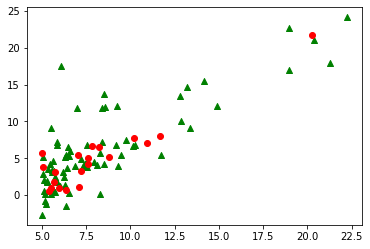

In [27]:
plot_data(X_train, X_test, y_train, y_test)

Підготовка тренувальних даних (додавання 0-колонки з одиницями). Ініціалізація параметрів регресії (0, 0): 

In [28]:
X_train_norm, mean, std = normalize(X_train)
X = prepare_X(X_train_norm)
theta = np.array([0, 0])

Для спрощення записів аліас для вектора передбачуваних значень

In [29]:
y = y_train[:]

У випадку використання ВСІХ даних для тренування (test_size=0.0), штрафна функція має повернути величину близьку до 32.072.

In [30]:
print('X: {}'.format(X.shape))
print('y: {}'.format(y.shape))
print(cost_function(X, y, theta))

X: (77, 2)
y: (77,)
34.48944754564479


Налаштування гіперпараметрів регресії: швидкості навчання та кількості ітерацій.

In [31]:
alpha = 0.01
num_iters = 1500

Запуск градієнтного спуску та видрук знайдених оптимальних значень на екран. У випадку використання всіх даних для тренування, результати будуть близькі до Theta 0: -3.63; Theta 1: 1.17

In [32]:
new_theta, Js = gradient_descent(X, y, theta, alpha, num_iters, False)
print('Theta 0: {}; Theta 1: {}'.format(new_theta[0], new_theta[1]))

Theta 0: 6.0588228268329205; Theta 1: 4.712776706032751


Відображення штрафної функції як функції від thetha0, thetha1.

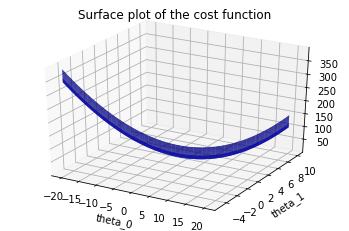

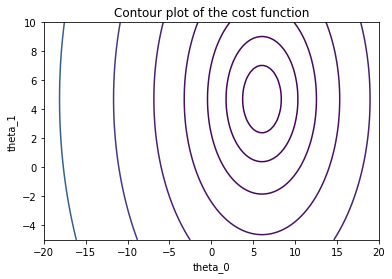

In [33]:
plot_J(X, y)

Відображення знайденої апроксимації разом із тренувальними даними.

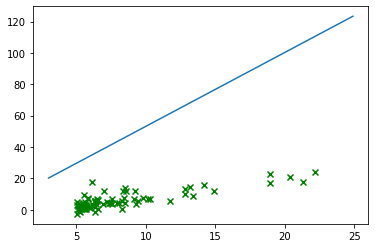

In [34]:
x = np.arange(3, 25, 0.1)
h = new_theta[0] + new_theta[1]*x

plt.plot(x, h)
plt.scatter(X_train, y_train, marker='x', c='green')

plt.show()

Оцінка похибки апроксимації на тестових даних (test_size має бути більше 0.0 та менше 1.0).

In [35]:
####################
# Нормалізувати тестовий датасет, використовуючи mean, std з тренувального
####################
X_test_proc, mean, std = normalize(X_test)
X_test_proc = prepare_X(X_test_proc)
y_test_pred = hypothesis(X_test_proc, new_theta)
rel_diff = np.abs(np.divide(y_test - y_test_pred, y_test)) * 100

res = pd.DataFrame({'X' : X_test, 'y_actual' : y_test, 'y_pred' : y_test_pred, 'err' : rel_diff})
print(res)
print(cost_function(X_test_proc, y_test, new_theta))

          X  y_actual     y_pred         err
19   7.0708   5.38930   4.828396   10.407725
67  10.2360   7.77540   9.130169   17.423789
49   5.5416   1.01790   2.750085  170.172428
9    5.0546   3.81660   2.088211   45.286087
44   7.8247   6.73180   5.853010   13.054310
53   7.6031   4.99810   5.551837   11.078948
45   7.0931   1.04630   4.858704  364.370070
12   5.7340   3.15510   3.011573    4.549050
73   7.2259   3.34110   5.039190   50.824292
87   6.0020   0.92695   3.375807  264.184416
90   5.7077   1.84510   2.975829   61.282803
48  11.7000   8.00430  11.119868   38.923683
77   5.0365   5.70140   2.063612   63.805174
96   5.4369   0.61705   2.607789  322.621999
34   8.2111   6.54260   6.378160    2.513374
60   8.8254   5.16940   7.213045   39.533511
21  20.2700  21.76700  22.767219    4.595115
82   6.3557   0.67861   3.856515  468.296292
91   7.6366   4.29590   5.597366   30.295543
27  10.9570   7.04670  10.110069   43.472390
2.1803772633325478
